# Exploratory Data Analysis - Part 2

## Import Libraries

In [288]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data & Preprocessing

In [289]:
df = pd.read_csv("final_clean_dataset.csv")
df.head()

,binome_id,binome_statut,mentor_id,workfield,mentee_id,field_of_study,study_level,degree,needs,average_grade,program,engagement_score,registration_date,desired_exchange_frequency
0,157729,REJECTED,63390,Human Resources,190853,"Commerce, Management, Economics, Management",Bac+1,Licence,[pro],Not specified (or Not provided),PP,3,2024-08-06 12:35:07,More than once per week
1,157825,REJECTED,63427,Computer science,190906,"IT, IS, Data, Web, Tech",Bac+2,BTS,[pro],Not specified (or Not provided),PNP,0,2024-08-09 15:28:21,Once every two weeks (or Bi-weekly)
2,157838,REJECTED,63393,Banking-Finance,190828,"Banking, Insurance and Finance",Bac+3,Licence,[pro],Not specified (or Not provided),PNP,4,2024-08-04 10:28:13,More than once per week
3,157856,REJECTED,63387,"Accounting, management",191078,"Accounting, Finance",Bac+1,BTS,[pro],Not specified (or Not provided),PNP,1,2024-08-26 13:00:52,More than once per week
4,157932,PENDING,63387,"Accounting, management",191020,"Commerce, Management, Economics, Management",Bac+1,Autre,[study],12 and 14,PP,5,2024-08-21 13:25:48,More than once per week


In [290]:
df['registration_date'] = pd.to_datetime(df['registration_date'], errors='coerce')
df['registration_month'] = df['registration_date'].dt.to_period('M')
df['registration_week'] = df['registration_date'].dt.to_period('W')

## Data overview

In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14667 entries, 0 to 14666
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   binome_id                   14667 non-null  int64         
 1   binome_statut               14667 non-null  object        
 2   mentor_id                   14667 non-null  int64         
 3   workfield                   13161 non-null  object        
 4   mentee_id                   14667 non-null  int64         
 5   field_of_study              14667 non-null  object        
 6   study_level                 14667 non-null  object        
 7   degree                      14667 non-null  object        
 8   needs                       14667 non-null  object        
 9   average_grade               14667 non-null  object        
 10  program                     14667 non-null  object        
 11  engagement_score            14667 non-null  int64     

In [292]:
df.describe()

,binome_id,mentor_id,mentee_id,engagement_score,registration_date
count,14667.000000,14667.000000,14667.000000,14667.000000,14667
mean,183003.453672,67307.385150,216580.534670,0.554715,2025-01-20 11:33:40.699188480
min,157729.000000,63387.000000,190796.000000,-7.000000,2024-08-01 15:10:27
25%,175660.000000,65349.000000,207883.500000,-2.000000,2024-12-08 00:05:57.500000
50%,183527.000000,67252.000000,217861.000000,0.000000,2025-01-26 01:12:24
75%,191822.500000,69203.000000,226419.000000,2.000000,2025-02-27 19:02:30.500000
max,200210.000000,71755.000000,236063.000000,15.000000,2025-07-26 21:58:14
std,10505.126042,2292.390566,12040.756283,3.414048,NaN


## EDA

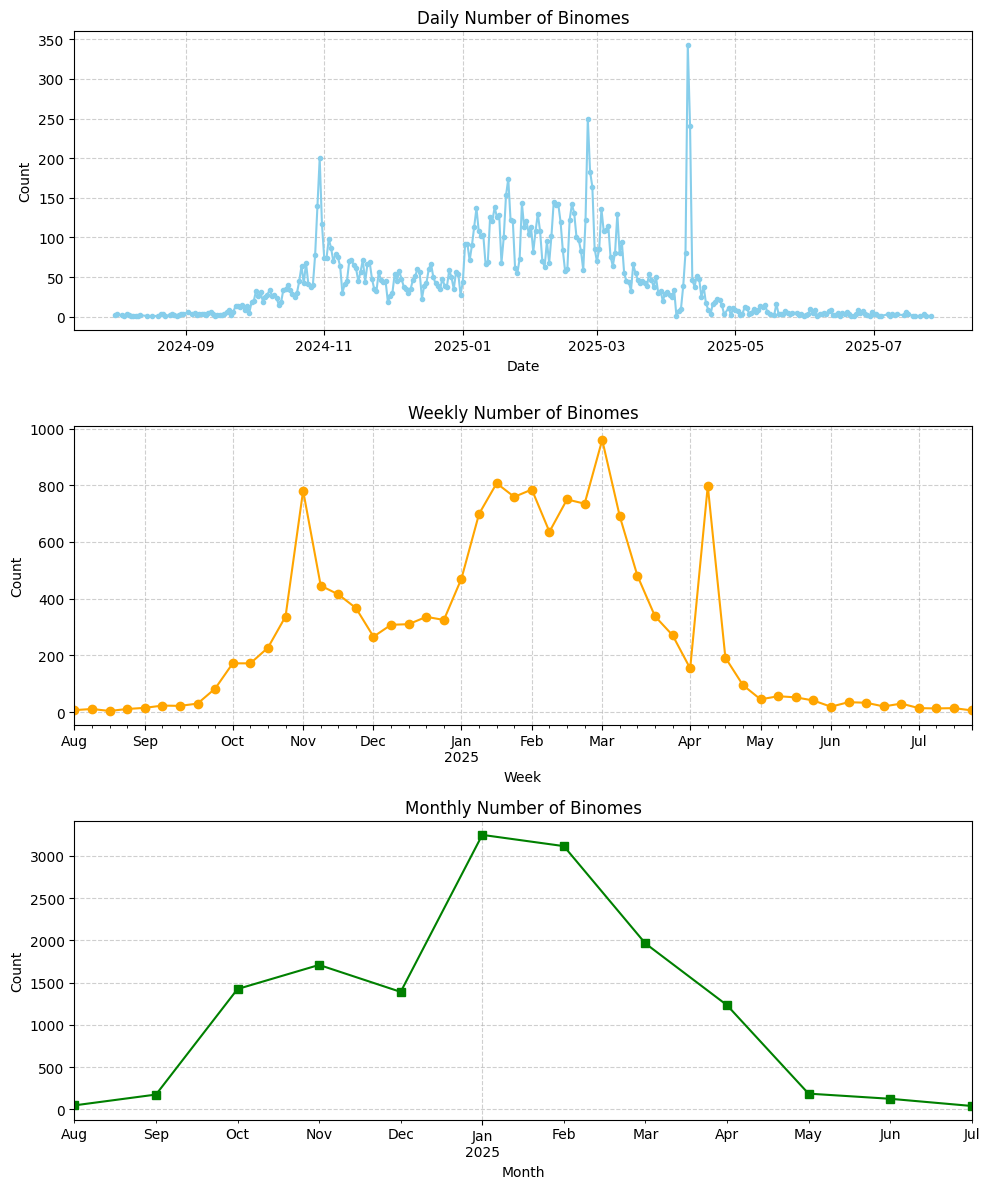

In [293]:
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

daily_counts.plot(ax=axes[0], color='skyblue', marker='.')
axes[0].set_title("Daily Number of Binomes")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Count")
axes[0].grid(True, linestyle='--', alpha=0.6)

weekly_counts.plot(ax=axes[1], color='orange', marker='o')
axes[1].set_title("Weekly Number of Binomes")
axes[1].set_xlabel("Week")
axes[1].set_ylabel("Count")
axes[1].grid(True, linestyle='--', alpha=0.6)

monthly_counts.plot(ax=axes[2], color='green', marker='s')
axes[2].set_title("Monthly Number of Binomes")
axes[2].set_xlabel("Month")
axes[2].set_ylabel("Count")
axes[2].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

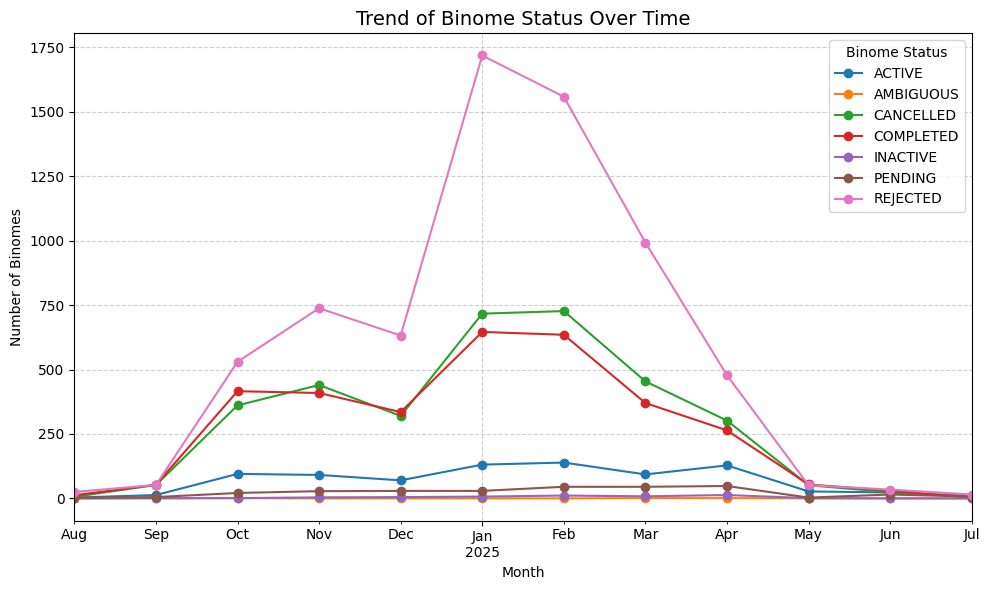

In [294]:
#Different Status
status_trend = (
    df.groupby([df['registration_month'], 'binome_statut'])
    .size()
    .reset_index(name='count')
)

status_pivot = status_trend.pivot(
    index='registration_month', columns='binome_statut', values='count'
).fillna(0)

status_pivot.index = status_pivot.index.to_timestamp()  # 轉回日期型態，方便畫圖
status_pivot.head()

plt.figure(figsize=(10,6))
status_pivot.plot(marker='o', figsize=(10,6))

plt.title("Trend of Binome Status Over Time", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Number of Binomes")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Binome Status")
plt.tight_layout()
plt.show()

In [295]:
#Trend by study level
study_trend = (
    df.groupby([df['registration_month'], 'study_level'])
    .size()
    .reset_index(name='num_students')
)
study_trend


,registration_month,study_level,num_students
0,2024-08,Bac+1,11
1,2024-08,Bac+2,9
2,2024-08,Bac+3,10
3,2024-08,Bac+4,7
4,2024-08,Bac+5 and plus,11
...,...,...,...
65,2025-07,Bac+2,8
66,2025-07,Bac+3,8
67,2025-07,Bac+4,9
68,2025-07,Bac+5 and plus,4


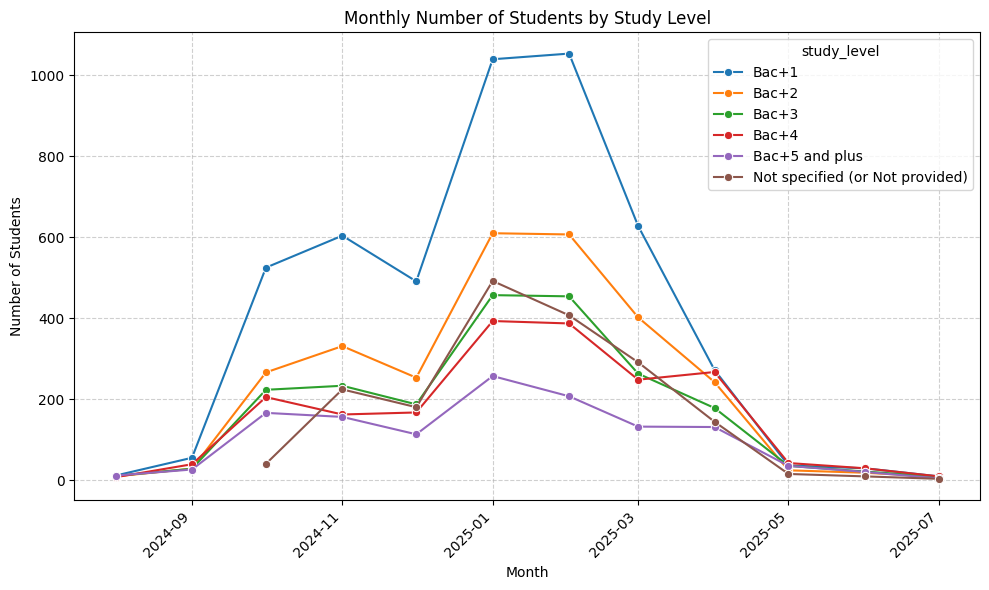

In [296]:
#Study Trend
if isinstance(study_trend['registration_month'].dtype, pd.PeriodDtype):
    study_trend['registration_month'] = study_trend['registration_month'].dt.to_timestamp()
else:
    study_trend['registration_month'] = pd.to_datetime(
        study_trend['registration_month'].astype(str), errors='coerce'
    )

# num_students → numeric
study_trend['num_students'] = pd.to_numeric(study_trend['num_students'], errors='coerce')

# 2) Drop rows that failed conversion and sort
study_trend = study_trend.dropna(subset=['registration_month', 'num_students'])
study_trend = study_trend.sort_values('registration_month')

# 3A) Plot with seaborn (multi-line)
plt.figure(figsize=(10,6))
sns.lineplot(
    data=study_trend,
    x='registration_month',
    y='num_students',
    hue='study_level',
    marker='o'
)
plt.title("Monthly Number of Students by Study Level")
plt.xlabel("Month")
plt.ylabel("Number of Students")
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [297]:
#Status and eng score
status_summary = (
    df.groupby('binome_statut')['engagement_score']
    .agg(['count', 'mean', 'median', 'std', 'min', 'max'])
    .round(2)
    .sort_values(by='mean', ascending=False)
)

print(status_summary)

               count  mean  median   std  min  max
binome_statut                                     
AMBIGUOUS          3  5.00     4.0  3.61    2    9
ACTIVE           823  2.84     2.0  3.89   -7   14
INACTIVE          51  2.69     3.0  3.57   -4   12
PENDING          277  2.56     2.0  3.81   -5   14
COMPLETED       3227  1.27     1.0  3.42   -7   14
CANCELLED       3460  0.63     0.0  3.47   -7   15
REJECTED        6826 -0.20    -1.0  3.04   -7   14


/tmp/ipykernel_69653/827433714.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='binome_statut', y='engagement_score', palette='Set2', showfliers=False)


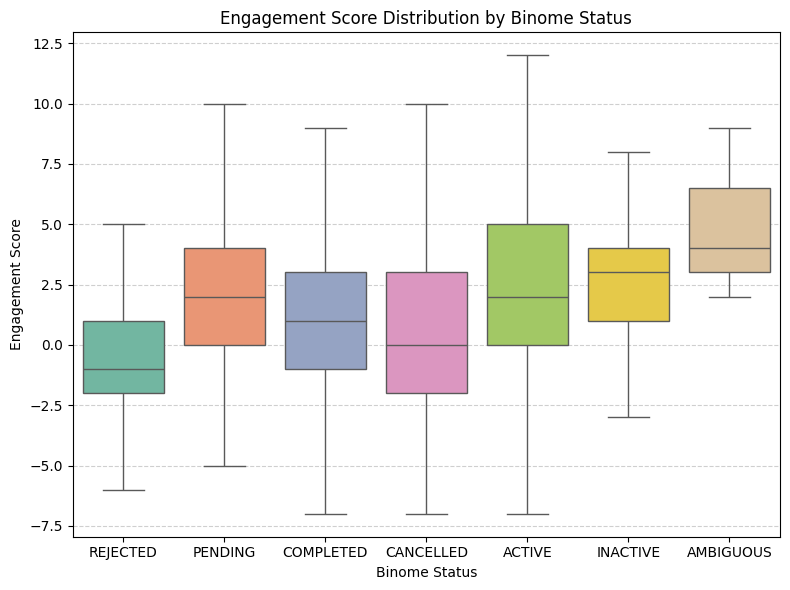

In [298]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='binome_statut', y='engagement_score', palette='Set2', showfliers=False)
plt.title("Engagement Score Distribution by Binome Status")
plt.xlabel("Binome Status")
plt.ylabel("Engagement Score")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


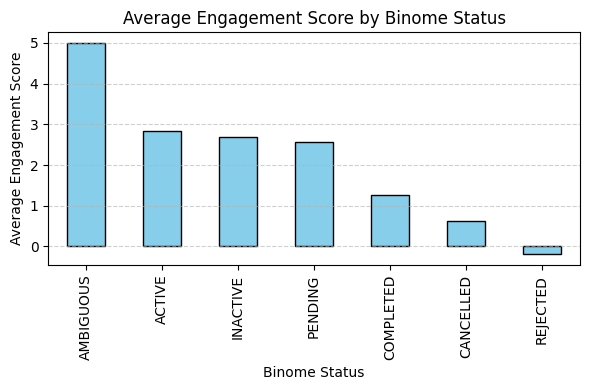

In [299]:
avg_eng = df.groupby('binome_statut')['engagement_score'].mean().sort_values(ascending=False)

plt.figure(figsize=(6,4))
avg_eng.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Average Engagement Score by Binome Status")
plt.xlabel("Binome Status")
plt.ylabel("Average Engagement Score")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


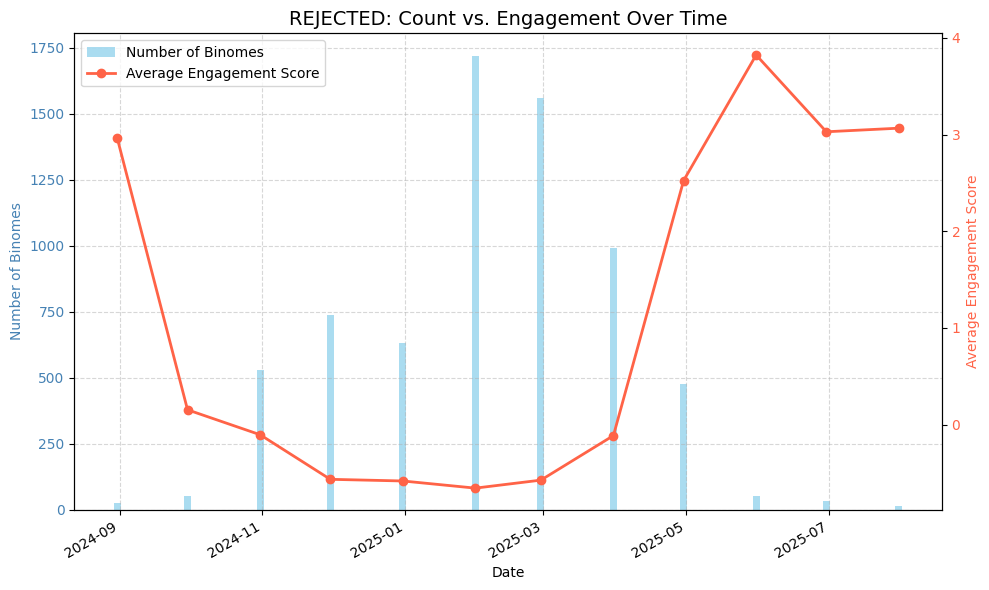

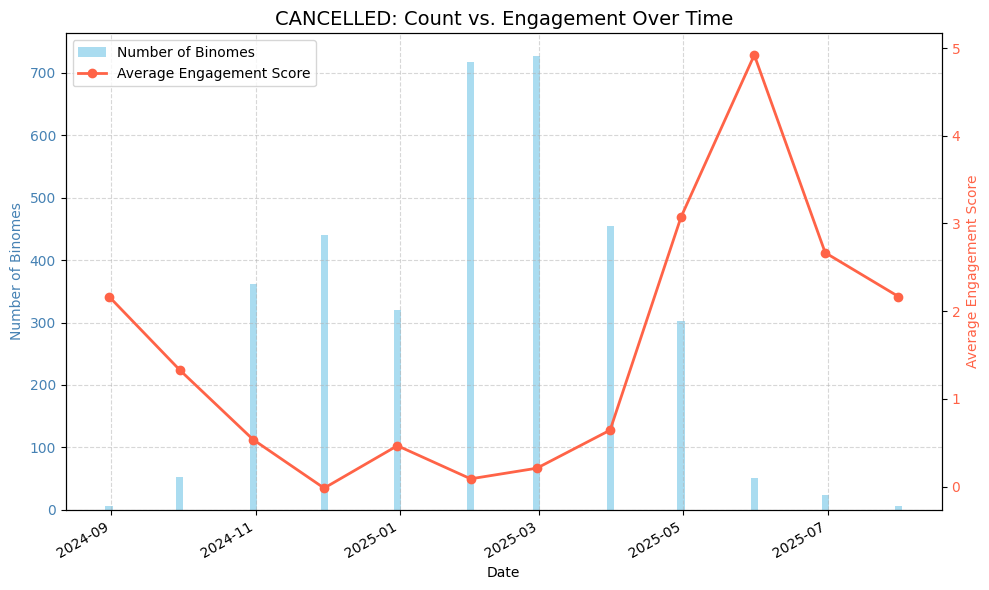

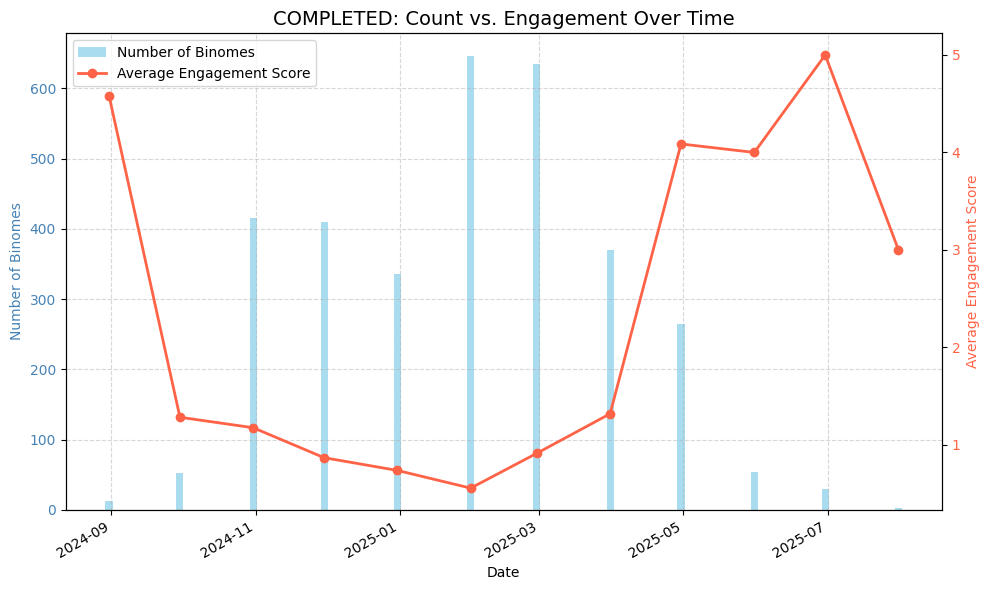

In [300]:

df_f = df[df['binome_statut'].isin(wanted)].copy()

df_f['engagement_score'] = pd.to_numeric(df_f['engagement_score'], errors='coerce')


def plot_bar_line(df_subset, status_label, freq='M'):
    """
    In same plot
    - left axis：count(bar)
    - right axis: engagement score
    """

    count_ts = (
        df_subset
        .set_index('registration_date')
        .resample(freq)['binome_id']
        .count()
        .rename('count')
    )
    mean_eng_ts = (
        df_subset
        .set_index('registration_date')
        .resample(freq)['engagement_score']
        .mean()
        .rename('avg_engagement')
    )

    ts = pd.concat([count_ts, mean_eng_ts], axis=1).fillna(0)


    fig, ax1 = plt.subplots(figsize=(10,6))


    bars = ax1.bar(
        ts.index, ts['count'],
        color='skyblue',
        alpha=0.7,
        label='Number of Binomes',
        width=3
    )
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Number of Binomes", color='steelblue')
    ax1.tick_params(axis='y', labelcolor='steelblue')
    ax1.grid(True, linestyle='--', alpha=0.5)

    # right axis: engagement score (Avg)
    ax2 = ax1.twinx()
    line = ax2.plot(
        ts.index, ts['avg_engagement'],
        color='tomato',
        marker='o',
        linewidth=2,
        label='Average Engagement Score'
    )
    ax2.set_ylabel("Average Engagement Score", color='tomato')
    ax2.tick_params(axis='y', labelcolor='tomato')


    plt.title(f"{status_label}: Count vs. Engagement Over Time", fontsize=14)
    fig.autofmt_xdate()

    lines_labels = [bars, line[0]]
    labels = [l.get_label() for l in lines_labels]
    ax1.legend(lines_labels, labels, loc='upper left')

    plt.tight_layout()
    plt.show()

# plot
for status in ['REJECTED', 'CANCELLED', 'COMPLETED']:
    plot_bar_line(df_f[df_f['binome_statut'] == status], status_label=status, freq='M')
